<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/3_Pr%C3%A1cticoIAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Mentoría Diplomatura en Ciencia de Datos 2020**
###**"Detección del desarrollo del cultivo con imágenes de Drones"**
###**Mentora**: Carolina Del Pilar Díaz

###**Introducción al Aprendizaje Automático**

 
En este laboratorio deben hacer experimentos de regresión y clasificación con el conjunto de datos obtenido en el práctico anterior.

Estudiarán el dataset y seleccionarán atributos relevantes a mano. 

El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes. Nuestro objetivo no será construir el mejor modelo, sino ganar un poco más de intuición sobre nuestro conjunto de datos, y tomar algunas decisiones sobre las que profundizaremos en el próximo práctico.

Luego, entrenarán y evaluarán diferentes tipos de regresiones y clasificadores, buscando las configuraciones que mejores resultados den.

###Preprocesamiento
Antes de aplicar los modelos, haremos un filtrado de los datos. Se sugiere seguir los siguientes pasos, pero pueden experimentar ustedes también otras alternativas.ZADOCK y RDTO serán nuestras variables objetivos, sobre la cual buscaremos hacer predicciones las cuáles poseen diferentes distribuciones.

###Crear los siguientes features:
Ciclos; Asignar el valor 0 al ciclo corto y valor 1 al ciclo largo.
Conjunto de datos; Variable binaria construida a partir de asignar 1 correspondiente a la 1° fecha de siembra, o 0 en caso contrario.
Pueden decidir otras configuraciones que necesiten.

###Recordar;
Una vez que el dataset resultante no tenga valores nulos, es necesario transformar las variables categóricas en variables numéricas (es decir, realizar un encoding de los datos) además de convertir longitud,latitud y fechas a numericas.

Más info https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd


###Elección de los modelos
Con los pasos anteriores, nuestro dataset debería ser una tabla con valores numéricos y sin valores nulos. Ahora, deberán separar el conjunto de datos en conjunto de entrenamiento (train) y conjunto de prueba (test). Por ahora, no utilizaremos conjunto de validación. Se recomienda utilizar el método train_test_split de scikitlearn, con un 80% para train y 20% para test.

Una vez divididos los datos, construimos los modelos predictivos. Entrenen cada modelo utilizando el conjunto de entrenamiento y los parámetros por defecto y evaluen la predicción utilizando las cinco métricas descriptas más adelante según corresponda al modelo. 

Es importante recordar, que el dataset posee dos targets con distribuciones diferentes, ZADOK y RDTO.

###Elección de métricas
Un aspecto fundamental del aprendizaje automático es la elección de métricas para evaluar los modelos predictivos según correspondan. En este práctico vamos a explorar las siguientes cinco métricas:
ECM, 
Accuracy,
F1
AUC ROC,
AUC Precision-Recall.

Para cada uno de los modelos que utilicen, calculen las cinco métricas. Pueden encontrar información sobre las últimas dos https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

###División en Entrenamiento y Evaluación
Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge


from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#DATA_DIRECTORY = './'
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dron_final.csv',decimal=".",sep=",")


In [7]:
dataset.sample(10)

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,InfraRojo,Borde_rojo,_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,RDTO,Fusariosis_otros,Manchas_Foliares_otros,Fecha,Temp_centigrados_Máx,Presion_hPa_Máx,Temp_suelo_centigrados_Máx,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Máx,Hum_porcentajeHR_Máx
538,7929,-2.057.272.724.607.630,-2.120.806.915.359.970,2daSiembra,CL,Variedad_K,3,103,4.3,3,46,47600,10230,44100,27400,14528,0.5044,0.2335,0.7565,0.4630,0.6234,4.3108,3.0355,1.6094,0.4759,-0.1736,-0.3370,1,0,0.00,2018-12-10,2018-01-12,50.0,3206,0,0,2018-12-10,19.40,985.625,15.0,1.2,18.407,98.24
28679,17125,-2.057.280.441.862.850,-2.120.816.521.233.800,2daSiembra,CC,Variedad_O,3,139,6.7,3,32,64800,17900,90300,51370,23989,0.5802,0.2747,0.8703,0.4736,0.6691,5.0446,3.7642,1.7578,0.5640,-0.1453,-0.2847,0,0,0.00,2018-09-24,2018-11-20,57.0,7066,0,0,2018-09-24,25.37,985.625,24.8,0.0,19.030,61.39
8879,8865,-2.057.299.690.053.090,-2.120.841.814.296.250,1er Siembra,CC,Variedad_U,3,60,6.9,3,1,52000,10990,48500,26380,14551,0.5384,0.2954,0.8076,0.5486,0.6305,4.4131,3.3331,1.8385,0.6089,-0.1394,-0.2735,0,0,0.00,2018-09-13,2018-11-18,66.0,4089,0,0,2018-09-13,19.44,984.375,20.4,12.0,17.079,99.52
24826,8839,-2.057.281.948.221.740,-2.120.807.824.845.210,2daSiembra,CC,Variedad_H,1,107,6.1,1,26,50500,11300,48000,28540,13279,0.5666,0.2542,0.8499,0.4487,0.6188,4.2477,3.6147,1.6818,0.5198,-0.0805,-0.1599,1,0,0.00,2018-09-28,2018-11-20,53.0,5183,0,0,2018-09-28,28.27,977.500,23.2,1.2,28.566,100.00
20831,12039,-2.057.287.640.800.930,-2.120.818.355.589.450,2daSiembra,CC,Variedad_I,2,119,6.9,2,37,63300,15430,92100,44310,18554,0.6646,0.3503,0.9969,0.5271,0.7130,5.9688,4.9638,2.0785,0.7316,-0.0919,-0.1823,0,0,5.00,2018-09-23,2018-11-20,58.0,4934,0,0,2018-09-23,30.06,981.250,26.4,0.0,26.132,62.12
6538,9626,-2.057.300.814.963.100,-2.120.845.257.865.370,1er Siembra,CC,Variedad_G,3,63,6.7,3,4,55500,12700,49800,32070,15406,0.5274,0.2165,0.7911,0.4105,0.5936,3.9212,3.2325,1.5528,0.4400,-0.0962,-0.1907,1,0,0.10,2018-09-14,2018-11-19,66.0,4428,1,0,2018-09-14,24.33,983.750,20.8,0.0,13.217,96.91
21343,9234,-2.057.284.310.613.750,-2.120.807.134.835.310,2daSiembra,CC,Variedad_I,1,108,6.9,1,27,54600,13580,57900,37340,17740,0.5309,0.2158,0.7963,0.4065,0.6200,4.2636,3.2638,1.5506,0.4386,-0.1328,-0.2610,0,0,5.00,2018-09-23,2018-11-20,58.0,5505,0,0,2018-09-23,30.06,981.250,26.4,0.0,26.132,62.12
17466,4062,-2.057.276.237.015.830,-2.120.802.708.083.150,2daSiembra,CL,Variedad_R,2,88,4.5,2,44,56300,13610,60100,38180,19485,0.5103,0.2230,0.7654,0.4370,0.6307,4.4158,3.0844,1.5741,0.4536,-0.1775,-0.3441,1,0,0.00,2018-08-10,2018-01-12,54.0,5022,0,0,2018-08-10,38.02,975.000,24.3,0.0,37.779,68.65
2545,6301,-2.057.310.414.356.550,-2.120.847.444.515.830,1er Siembra,CC,Variedad_Q,2,50,6.5,2,10,53100,13300,51500,33980,18334,0.4749,0.2049,0.7123,0.4315,0.5895,3.8721,2.8089,1.5155,0.4158,-0.1591,-0.3104,0,0,0.00,2018-09-15,2018-11-20,66.0,6009,0,0,2018-09-15,24.35,979.375,21.0,0.0,19.835,100.00
5642,4689,-2.057.314.428.884.980,-2.120.844.166.969.940,1er Siembra,CC,Variedad_T,1,43,6.6,1,10,56900,11330,62100,28730,12181,0.6720,0.3673,1.0080,0.5466,0.6914,5.4810,5.0981,2.1615,0.7708,-0.0361,-0.0722,0,0,0.02,2018-09-14,2018-11-19,66.0,4050,1,0,2018-09-14,24.33,983.750,20.8,0.0,13.217,96.91


### Preprocesamiento:

In [ ]:
# Ciclos; Asignar el valor 0 al ciclo corto y valor 1 al ciclo largo
dataset['Ciclos'] = dataset['Ciclos'].replace(['CC'], 0)
dataset['Ciclos'] = dataset['Ciclos'].replace(['CL'], 1)

# Conjunto de datos; Asignar 1 correspondiente a la 1° fecha de siembra, o 0 en caso contrario.
dataset['Conjunto_de_datos'] = dataset['Conjunto_de_datos'].replace(['2daSiembra'], 0)
dataset['Conjunto_de_datos'] = dataset['Conjunto_de_datos'].replace(['1er Siembra'], 1)

# Transformar las variables categóricas en variables numéricas
dataset = pd.get_dummies(dataset, columns=['Variedad'], drop_first=True)
dataset.columns = dataset.columns.str.replace('Variedad_Variedad_', 'Variedad_')

# Convertir longitud,latitud y fechas a numericas

dataset.Fecha_de_espigazon = dataset['Fecha_de_espigazon'].str.replace('-','').astype(int)
dataset.Fecha_de_madurez = dataset['Fecha_de_madurez'].str.replace('-','').astype(int)
dataset.Fecha = dataset['Fecha'].str.replace('-','').astype(int)

dataset.sample(5)



,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,InfraRojo,Borde_rojo,_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,RDTO,Fusariosis_otros,Manchas_Foliares_otros,Fecha,Temp_centigrados_Máx,Presion_hPa_Máx,Temp_suelo_centigrados_Máx,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Máx,Hum_porcentajeHR_Máx,Variedad_B,Variedad_C,Variedad_D,Variedad_E,Variedad_F,Variedad_G,Variedad_H,Variedad_I,Variedad_J,Variedad_K,Variedad_L,Variedad_M,Variedad_N,Variedad_O,Variedad_P,Variedad_Q,Variedad_R,Variedad_S,Variedad_T,Variedad_U
11253,13206,-2.057.282.090.758.630,-2.120.815.095.051.290,0,0,2,124,6.5,2,32,60600,15370,62600,43040,20628,0.5043,0.1851,0.7564,0.3671,0.6057,4.0728,3.0347,1.4544,0.3746,-0.1460,-0.2860,2,0,5.0,20180925,20181120,56.0,5799,1,0,20180925,27.66,981.875,24.7,0.0,15.832,83.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
286,290,-2.057.276.510.751.440,-2.120.796.986.348.990,0,1,1,74,4.3,1,39,56200,13790,63700,40260,19505,0.5311,0.2254,0.7967,0.4244,0.6440,4.6192,3.2658,1.5822,0.4588,-0.1716,-0.3334,1,0,5.0,20181210,20180112,50.0,2554,0,0,20181210,19.40,985.625,15.0,1.2,18.407,98.24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
25599,13026,-2.057.283.354.966.700,-2.120.815.097.481.100,0,0,2,123,6.1,2,33,54700,12550,50400,32840,15704,0.5248,0.2109,0.7872,0.4019,0.6012,4.0159,3.2093,1.5347,0.4283,-0.1116,-0.2205,1,0,0.0,20180928,20181120,53.0,5702,0,0,20180928,28.27,977.500,23.2,1.2,28.566,100.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22581,16571,-2.057.298.280.068.390,-2.120.835.701.393.980,1,1,2,15,5.9,2,21,53600,13410,50800,37760,20591,0.4231,0.1472,0.6347,0.3479,0.5823,3.7882,2.4670,1.3453,0.2966,-0.2111,-0.4043,1,0,0.0,20180510,20181126,52.0,5046,0,0,20180510,24.76,988.750,22.2,0.0,28.324,76.66,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
20397,14131,-2.057.304.700.720.840,-2.120.831.230.909.820,1,1,1,7,5.9,1,20,45200,10740,38600,32060,17211,0.3832,0.0925,0.5748,0.2415,0.5646,3.5940,2.2427,1.2039,0.1856,-0.2315,-0.4394,1,0,0.0,20180930,20181128,59.0,7542,1,0,20180930,27.38,976.875,22.9,0.0,26.454,91.62,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Keep only data columns
feature_names = dataset.columns.values.tolist()
feature_names.remove('ID')
feature_names.remove('RDTO')
feature_names.remove('Longitude')
feature_names.remove('Latitude')

# Create dron dict
dron = dict()
dron['feature_names'] = np.array(feature_names)
dron["data"] = dataset[feature_names].to_numpy()
dron["target"] = dataset.RDTO.to_numpy()

In [ ]:
# División entre instancias y etiquetas
X, y = dron["data"], dron["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23659, 58), (5915, 58), (23659,), (5915,))

In [ ]:
dataset[feature_names]

,Conjunto_de_datos,Ciclos,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,InfraRojo,Borde_rojo,_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,Fusariosis_otros,Manchas_Foliares_otros,Fecha,Temp_centigrados_Máx,Presion_hPa_Máx,Temp_suelo_centigrados_Máx,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Máx,Hum_porcentajeHR_Máx,Variedad_B,Variedad_C,Variedad_D,Variedad_E,Variedad_F,Variedad_G,Variedad_H,Variedad_I,Variedad_J,Variedad_K,Variedad_L,Variedad_M,Variedad_N,Variedad_O,Variedad_P,Variedad_Q,Variedad_R,Variedad_S,Variedad_T,Variedad_U
0,0,1,2,89,4.3,2,43,56800,13050,56200,32100,13653,0.6090,0.2729,0.9136,0.4480,0.6231,4.3065,4.1163,1.7507,0.5600,-0.02250,-0.04510,1,0,0.0,20181210,20180112,50.0,0,0,20181210,19.40,985.625,15.0,1.2,18.407,98.24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,2,89,4.3,2,43,52800,11800,50600,30590,16463,0.5090,0.2464,0.7635,0.4841,0.6217,4.2881,3.0735,1.6541,0.5032,-0.16490,-0.32120,1,0,0.0,20181210,20180112,50.0,0,0,20181210,19.40,985.625,15.0,1.2,18.407,98.24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,2,89,4.3,2,43,50600,11530,48800,30310,16137,0.5029,0.2337,0.7544,0.4646,0.6177,4.2324,3.0241,1.6100,0.4762,-0.16650,-0.32400,1,0,0.0,20181210,20180112,50.0,0,0,20181210,19.40,985.625,15.0,1.2,18.407,98.24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,2,89,4.3,2,43,60100,11870,63800,30330,11869,0.6862,0.3555,1.0294,0.5181,0.6862,5.3748,5.3753,2.1035,0.7436,0.00004,0.00008,1,0,0.0,20181210,20180112,50.0,0,0,20181210,19.40,985.625,15.0,1.2,18.407,98.24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,2,89,4.3,2,43,49000,11310,52100,30130,14079,0.5745,0.2671,0.8617,0.4650,0.6432,4.6065,3.7005,1.7291,0.5476,-0.10900,-0.21550,1,0,0.0,20181210,20180112,50.0,0,0,20181210,19.40,985.625,15.0,1.2,18.407,98.24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,1,1,3,33,5.8,3,24,61300,16670,65900,45630,20960,0.5173,0.1817,0.7760,0.3512,0.5962,3.9532,3.1440,1.4442,0.3675,-0.11400,-0.22500,0,0,0.0,20180110,20181124,54.0,0,0,20180110,17.37,986.875,21.2,0.0,36.713,89.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
29570,1,1,3,33,5.8,3,24,59200,15900,64200,44980,20281,0.5198,0.1760,0.7797,0.3386,0.6029,4.0377,3.1655,1.4273,0.3557,-0.12100,-0.23860,0,0,0.0,20180110,20181124,54.0,0,0,20180110,17.37,986.875,21.2,0.0,36.713,89.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
29571,1,1,3,33,5.8,3,24,56500,14670,59800,42460,19656,0.5052,0.1695,0.7578,0.3356,0.6060,4.0763,3.0423,1.4083,0.3424,-0.14520,-0.28450,0,0,0.0,20180110,20181124,54.0,0,0,20180110,17.37,986.875,21.2,0.0,36.713,89.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
29572,1,1,3,33,5.8,3,24,54500,13720,43600,34180,16346,0.4546,0.1211,0.6819,0.2663,0.5212,3.1778,2.6673,1.2755,0.2434,-0.08730,-0.17330,0,0,0.0,20180110,20181124,54.0,0,0,20180110,17.37,986.875,21.2,0.0,36.713,89.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


###**1.Regresión**

###**1.1.Regresión Lineal**

Elegir un atributo para el target "RDTO", instancie una regresión lineal,evaluar ECM de train y test, grafique el modelo junto a los puntos de train y test.Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
feature = 'Roya_porcentaje'
selector = (dron['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((23659, 1), (5915, 1))

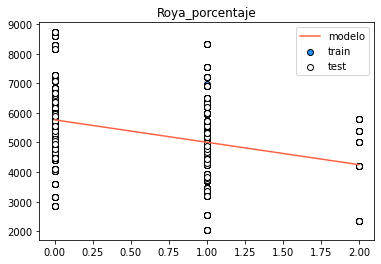

In [ ]:
# Instanciamos y entrenamos
model = LinearRegression()
model.fit(X_train_f, y_train)

# Predecimos
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

# Graficamos
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:.2f}')
print(f'Test error: {test_error:2f}')

Train error: 1260409.13
Test error: 1189126.992615


#### INTERPRETACION

Al ser un modelo lineal no es posible ajustar la recta a los valores por predecir. Ademas, notamos claramente que los errores tanto en train como en test son demasiados elevados.
Tambien pudimos verificar, que haciendo varias pruebas con distintas variables, todas tenian un resultado similar, con errores altos.

###**1.2.Regresión Polinomial**

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando scikit-learn.Deben usar el mismo atributo seleccionado para el ejercicio anterior.Instancie y entrene, prediga y calcule error train y test, imprima valores, guarde errores.
Grafique las curvas de error en términos del grado del polinomio.
Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.Interprete el resultado.

In [ ]:
train_errors = []
test_errors = []
degrees = range(30)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

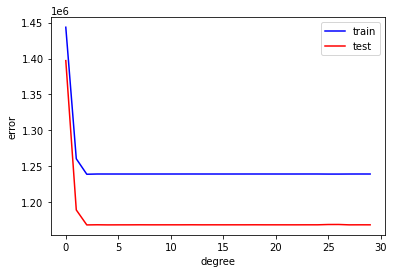

In [ ]:
# Graficamos curvas de error
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

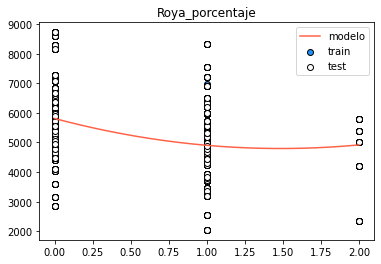

In [ ]:

# Reconstruimos mejor modelo y graficamos

# train:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)
    
# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:.2f}')
print(f'Test error: {test_error:2f}')

Train error: 37176.56
Test error: 36007.834772


#### INTERPRETACION

Seleccionamos el modelo que contiene un polinomio de grado 2, ya que es el que contiene menor error. Asi mismo, concluimos que por mas que el modelo nos de la libertad de trabajar con distintos grados en el polinomio, esto no permite que disminuyan los errores, ni que la prediccion de los valores mejore. 

###**1.3.Regresión con más de un atributo**

Seleccione dos o tres atributos entre los más relevantes.
Repita el ejercicio anterior, pero usando los atributos seleccionados.
Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# Con dos atributos fs:
#selector = ((dron['feature_names'] == 'Roya_porcentaje') | (dron['feature_names'] == 'dias_entre_fechas') | (dron['feature_names'] == 'Hum_porcentajeHR_Máx'))

selector = ((dron['feature_names'] == 'Roya_porcentaje') | 
            (dron['feature_names'] == 'dias_entre_fechas') |
            (dron['feature_names'] == 'Temp_centigrados_Máx'))
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((23659, 3), (5915, 3))

In [ ]:
train_errors = []
test_errors = []
degrees = range(1,10)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

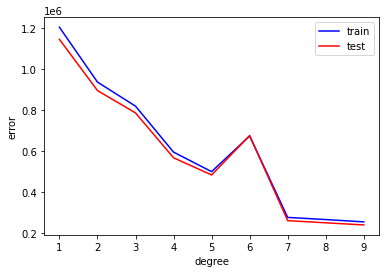

In [ ]:
# Graficamos curvas de error
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [ ]:
print(train_errors[4])
print(test_errors[4])

499293.39344434347
483014.2269371703


#### INTERPRETACION

Notamos que no solo alcanza con aumentar la complejidad del modelo polinomico (aumentar los grados), sino que es necesario incluir mas variables que nos permitan realizar mejores predicciones. En este caso, al utilizar tres variables obtenemos una mejora notable en la disminucion del error de train y test, donde en el grado 7 se obtiene el valor mas bajo.

###**1.4.Regresión múltiple. Completa**
Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [ ]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# predict:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:2f}')
print(f'Test error: {test_error:2f}')

Train error: 505.033863
Test error: 3065.821932


#### INTERPRETACION

Reafirmando la anteriror conclusion, al agregar mas variables, le permitimos al modelo tomar mayor informacion para poder mejorar las predicciones y de esta forma reducir demasiado los errores.

###**1.5.Regularización**
Utilizar diferentes valores de alpha. ¿Mejora?

In [ ]:
train_errors = []
test_errors = []
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha_value in alpha_values:
    model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=alpha_value))
    model.fit(X_train, y_train)
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

test_errors

[6563.369824911127,
 2355.928722117723,
 2935.6547275523676,
 2747.6952437309706,
 1808.6658799181698,
 2458.112905021906,
 9267.44618002386]

In [ ]:
train_errors

[569.6448460577772,
 510.44541753954604,
 503.21601816316155,
 508.31348700523677,
 579.5739727955435,
 1483.9096406323872,
 8362.019026704795]

#### INTERPRETACION

Al utilizar el termino de regularizacion, comprobamos que se evita el overfitting en el conjunto de Train, reduciendo el error de la prediccion en el conjunto de Test.

### Aplicando regularización y normalizando datos de entrada

In [ ]:
train_errors = []
test_errors = []
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha_value in alpha_values:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(2), Ridge(alpha=alpha_value))
    model.fit(X_train, y_train)
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

test_errors

[1523.6775684148722,
 1519.1822298339039,
 1509.9742138156855,
 1738.8371111729275,
 4236.939420108997,
 11589.473163313702,
 36007.83477223648]

#### INTERPRETACION

Siguiendo la misma tendencia que se venia dando al aplicar regularizacion al modelo, podemos visualizar claramente que al aplicar normalizacion sobre los datos de entrada al modelo permite reducir considerablemente el error de prediccion del modelo sobre el conjunto de test.

###**2.Clasificación**


###**2.1.SGDClassifier con selección de hiperparámetros**. 
Probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.Usar grid-search y 5-fold cross-validation. Reportar métricas y varianzas.Reportar accuracy promedio y varianza para todas las configuraciones, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

Accuracy
Precision
Recall
F1
matriz de confusión
Documentación:

In [20]:
# DATA_DIRECTORY = './'
dataset=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dron_final.csv', decimal=".", sep=",")

# Ciclos; Asignar el valor 0 al ciclo corto y valor 1 al ciclo largo
dataset['Ciclos'] = dataset['Ciclos'].replace(['CC'], 0)
dataset['Ciclos'] = dataset['Ciclos'].replace(['CL'], 1)

# Conjunto de datos; Asignar 1 correspondiente a la 1° fecha de siembra, o 0 en caso contrario.
dataset['Conjunto_de_datos'] = dataset['Conjunto_de_datos'].replace(['2daSiembra'], 0)
dataset['Conjunto_de_datos'] = dataset['Conjunto_de_datos'].replace(['1er Siembra'], 1)

# Transformar las variables categóricas en variables numéricas
dataset = pd.get_dummies(dataset, columns=['Variedad'], drop_first=True)
dataset.columns = dataset.columns.str.replace('Variedad_Variedad_', 'Variedad_')

# Convertir longitud,latitud y fechas a numericas

dataset.Fecha_de_espigazon = dataset['Fecha_de_espigazon'].str.replace('-','').astype(int)
dataset.Fecha_de_madurez = dataset['Fecha_de_madurez'].str.replace('-','').astype(int)
dataset.Fecha = dataset['Fecha'].str.replace('-','').astype(int)

In [21]:
# Keep only data columns
feature_names = dataset.drop(['ID','Longitude','Latitude'], axis=1).columns.values.tolist()

# Create dron dict
dron = dict()
dron['feature_names'] = np.array(feature_names)
dron["data"] = dataset[feature_names].to_numpy()
dron["target"] = dataset["ZADOCK"].astype(str)

In [22]:
dataset_for_correlation_check = dataset[feature_names]
correlation = dataset_for_correlation_check.corr()

correlation[1-np.abs(correlation['ZADOCK']) < 0.40]['ZADOCK']

Ciclos              -0.726937
ZADOCK               1.000000
columna             -0.734918
Fecha_de_madurez     0.807105
dias_entre_fechas    0.682883
Name: ZADOCK, dtype: float64

#### Detectamos una fuerte correlación entre la variable TARGET y algunos features, procedemos a removerlas como así también a las variables dependientes

In [23]:
# Removemos TARGET, agregado anteriormente para obtener correlación
feature_names.remove('ZADOCK')
# Removemos features con fuerte correlación y dependientes
feature_names.remove('Ciclos')
feature_names.remove('columna')
feature_names.remove('Fecha_de_madurez')
feature_names.remove('dias_entre_fechas')
feature_names.remove('Fecha_de_espigazon')
feature_names.remove('RDTO')

# Seteamos nuestro nuevo conjunto de features
dron['feature_names'] = np.array(feature_names)
dron["data"] = dataset[feature_names].to_numpy()
dron["target"] = dataset["ZADOCK"].astype(str)

In [24]:
# Features a utilizar en la clasificación
feature_names

['Conjunto_de_datos',
 'Rep',
 'Parcela',
 'fila',
 'Azul',
 'Verde',
 'InfraRojo',
 'Borde_rojo',
 '_Rojo',
 'NDVI',
 'NDRE',
 'SAVI',
 'SCCI',
 'GNDVI',
 'GVI',
 'RVI',
 'RedEdg',
 'LNVI',
 'GRVI',
 'MGRVI',
 'Roya_porcentaje',
 'Carbon_porcentaje',
 'Adversidades',
 'Fusariosis_otros',
 'Manchas_Foliares_otros',
 'Fecha',
 'Temp_centigrados_Máx',
 'Presion_hPa_Máx',
 'Temp_suelo_centigrados_Máx',
 'Intende_Lluvia_mm_h',
 'Vel_de_Viento_Km_h_Máx',
 'Hum_porcentajeHR_Máx',
 'Variedad_B',
 'Variedad_C',
 'Variedad_D',
 'Variedad_E',
 'Variedad_F',
 'Variedad_G',
 'Variedad_H',
 'Variedad_I',
 'Variedad_J',
 'Variedad_K',
 'Variedad_L',
 'Variedad_M',
 'Variedad_N',
 'Variedad_O',
 'Variedad_P',
 'Variedad_Q',
 'Variedad_R',
 'Variedad_S',
 'Variedad_T',
 'Variedad_U']

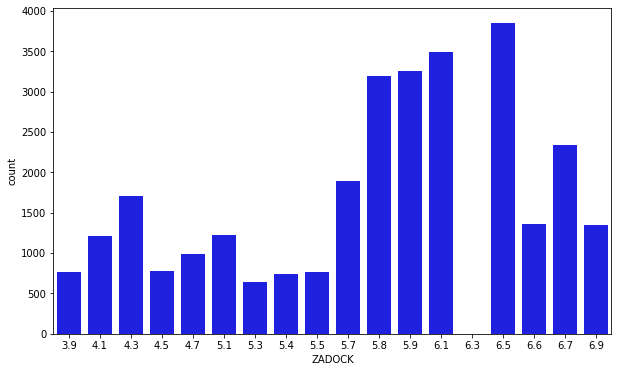

In [25]:
# Analizamos si la variable target esta desbalanceada
import seaborn

plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x ='ZADOCK', color = 'blue')

In [26]:
dataset.ZADOCK.describe()

count    29574.000000
mean         5.754619
std          0.826099
min          3.900000
25%          5.400000
50%          5.900000
75%          6.500000
max          6.900000
Name: ZADOCK, dtype: float64

In [27]:
# División entre instancias y etiquetas
X, y = dron["data"], dron["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23659, 52), (5915, 52), (23659,), (5915,))

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterSampler
from sklearn.linear_model import SGDClassifier
import warnings

warnings.filterwarnings('ignore')

In [ ]:
param_grid={ 
    'loss': ['hinge', 'log'],
    'alpha':  [0.1, 0.01, 0.001],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 
    'eta0': [0.1]}

model=SGDClassifier(random_state=2 , max_iter=300)

cv=GridSearchCV(model, param_grid, scoring = 'f1_weighted', verbose=10, n_jobs=-1)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=300,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=2,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001], 'eta0': [0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
       

In [ ]:
results=cv.cv_results_
df=pd.DataFrame(results).sort_values('rank_test_score')
df[['param_loss', 'param_alpha', 'param_learning_rate', 'param_eta0', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,param_learning_rate,param_eta0,mean_test_score,std_test_score,rank_test_score
22,hinge,0.001,adaptive,0.1,0.088319,0.014485,1
23,log,0.001,adaptive,0.1,0.088246,0.014269,2
15,log,0.01,adaptive,0.1,0.067594,0.017540,3
14,hinge,0.01,adaptive,0.1,0.061612,0.012319,4
6,hinge,0.1,adaptive,0.1,0.030480,0.013500,5
7,log,0.1,adaptive,0.1,0.030480,0.013500,5
21,log,0.001,invscaling,0.1,0.023163,0.002837,7
20,hinge,0.001,invscaling,0.1,0.019106,0.009157,8
19,log,0.001,optimal,0.1,0.015745,0.007862,9
11,log,0.01,optimal,0.1,0.015745,0.007862,9


In [ ]:
# Get best model
best_model = cv.best_estimator_


predictions = best_model.predict(X_train)
print ('Accuracy: %f ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

predictions = best_model.predict(X_test)
print ('Accuracy: %f ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

print(classification_report(y_test, predictions))


Accuracy: 8.056131 
Accuracy: 7.979713 
              precision    recall  f1-score   support

         3.9       0.00      0.00      0.00       161
         4.1       0.00      0.00      0.00       232
         4.3       0.00      0.00      0.00       329
         4.5       0.00      0.00      0.00       162
         4.7       0.00      0.00      0.00       197
         5.1       0.15      0.02      0.04       241
         5.3       0.00      0.00      0.00       123
         5.4       0.00      0.00      0.00       157
         5.5       0.00      0.00      0.00       157
         5.7       0.00      0.00      0.00       351
         5.8       0.25      0.18      0.21       663
         5.9       0.21      0.23      0.22       649
         6.1       0.23      0.15      0.18       698
         6.3       0.00      0.00      0.00         0
         6.5       0.23      0.08      0.12       765
         6.6       0.25      0.05      0.09       263
         6.7       0.22      0.02      0.

###**2.2.DecisionTreeClassifier**. 
Idem anterior

In [13]:
clf_model = DecisionTreeClassifier(random_state=0)

param_grid = {
    'criterion': [
        'gini',
        'entropy',
    ],
    'max_depth': list(range(10,18)),
    'min_samples_leaf' : list(range(1,4)),
}

# Param cv = None (default), to use the default 5-fold cross validation
cv = GridSearchCV(clf_model, param_grid, scoring='accuracy', verbose=10, n_jobs=-1)
cv.fit(X_train, y_train);


results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']]

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
29,entropy,11,3,0.999535,0.000410,1
47,entropy,17,3,0.999451,0.000343,2
32,entropy,12,3,0.999451,0.000343,2
38,entropy,14,3,0.999451,0.000343,2
41,entropy,15,3,0.999451,0.000343,2
35,entropy,13,3,0.999451,0.000343,2
44,entropy,16,3,0.999451,0.000343,2
27,entropy,11,1,0.999451,0.000316,8
28,entropy,11,2,0.999451,0.000392,9
31,entropy,12,2,0.999366,0.000299,10


In [14]:
# Get best model
best_model = cv.best_estimator_


predictions = best_model.predict(X_train)
print ('Accuracy: %f ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

predictions = best_model.predict(X_test)
print ('Accuracy: %f ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

print(classification_report(y_test, predictions))

Accuracy: 99.983093 
Accuracy: 99.915469 
              precision    recall  f1-score   support

         3.9       1.00      1.00      1.00       161
         4.1       1.00      1.00      1.00       232
         4.3       1.00      1.00      1.00       329
         4.5       1.00      1.00      1.00       162
         4.7       1.00      1.00      1.00       197
         5.1       1.00      1.00      1.00       241
         5.3       1.00      1.00      1.00       123
         5.4       1.00      1.00      1.00       157
         5.5       1.00      1.00      1.00       157
         5.7       1.00      1.00      1.00       351
         5.8       1.00      1.00      1.00       663
         5.9       1.00      1.00      1.00       649
         6.1       1.00      1.00      1.00       698
         6.5       1.00      1.00      1.00       765
         6.6       1.00      1.00      1.00       263
         6.7       1.00      1.00      1.00       520
         6.9       1.00      1.00      

###**2.3.Random Forest**
idem anterior

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [29]:

param_distributions = {'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 6], 'n_estimators': [30,60], 'max_features':['sqrt','log2',6]}
random_cv=RandomizedSearchCV( RandomForestClassifier(random_state=1, n_jobs=-1) ,param_distributions, n_iter=10, scoring='accuracy', cv=3, n_jobs=-1)


random_cv.fit(X_train, y_train)
best_model=random_cv.best_estimator_

In [30]:
print('random forest accuracy: ', random_cv.best_score_)
print(best_model)


random forest accuracy:  0.9982247984714089
RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=60, n_jobs=-1, random_state=1)


In [31]:
# Get best model
best_model = random_cv.best_estimator_


predictions = best_model.predict(X_train)
print ('Accuracy: %f ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

predictions = best_model.predict(X_test)
print ('Accuracy: %f ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

print(classification_report(y_test, predictions))

Accuracy: 100.000000 
Accuracy: 99.898563 
              precision    recall  f1-score   support

         3.9       1.00      1.00      1.00       161
         4.1       1.00      1.00      1.00       232
         4.3       1.00      1.00      1.00       329
         4.5       1.00      1.00      1.00       162
         4.7       1.00      1.00      1.00       197
         5.1       1.00      1.00      1.00       241
         5.3       0.97      0.99      0.98       123
         5.4       1.00      1.00      1.00       157
         5.5       1.00      1.00      1.00       157
         5.7       1.00      1.00      1.00       351
         5.8       1.00      1.00      1.00       663
         5.9       1.00      0.99      1.00       649
         6.1       1.00      1.00      1.00       698
         6.5       1.00      1.00      1.00       765
         6.6       1.00      1.00      1.00       263
         6.7       1.00      1.00      1.00       520
         6.9       1.00      1.00     

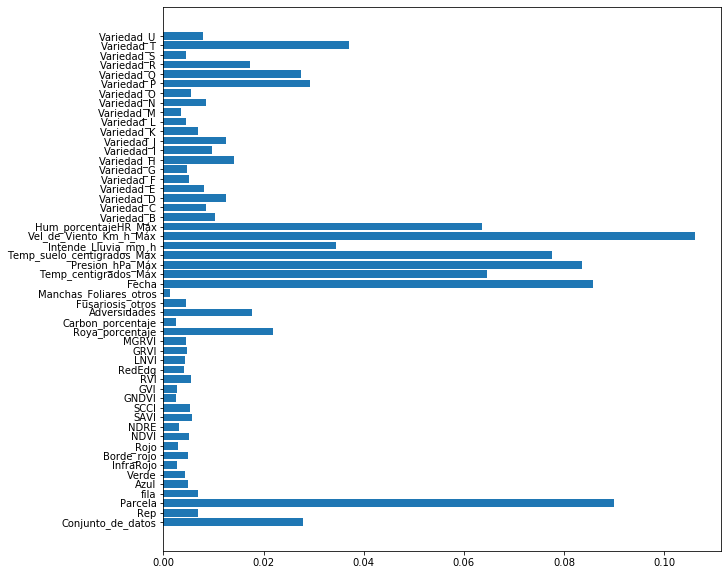

In [34]:
# Importancia de las variables input del modelo
from matplotlib import pyplot
plt.figure(figsize=(10,10))
pyplot.barh(feature_names, best_model.feature_importances_)
pyplot.show()

###**2.4. Responder**

¿Qué diferencias hay entre los distintos modelos? ¿Qué tan buenas son las predicciones?

Jueguen un poco variando algunos parámetros (no es necesario hacer una búsqueda sistemática). ¿Qué parámetros influyen más en el desempeño de los clasificadores? ¿Por qué les parece que algunos parámetros influyen más que otros?



- El clasificador SGD implementa modelos lineales regularizados con aprendizaje por descenso de gradientes, pudimos observar un menor rendimiento en cuanto a presición de las clasificaciones.

- Los otros dos modelos, basados en árboles de decisión (Decision Tree y Random Forest), mejoraron la clasificación. Su estructura y funcionamiento es muy diferente al clasificador SGD ya que estos últimos se basan en árboles que van generando nuevas ramas a medida que van dividiendo el conjunto de datos en función a un feature en particular.

###**2.5.Normalizando los datos de entrada**
 (pueden usar, por ejemplo MinMaxScaler o StandardScaler). ¿Hay alguna diferencia en el resultado de los modelos? ¿A qué se debe?

- Se observa una diferencia en el SGDClassifier ya que el mismo es sensible a la normalización de features, incluso se indica que es necesario hacerlo en la propia documentación. En el caso de los árboles, no son afectados por la no normalización de los datos por lo que se obtiene un resultado similar.

Finalmente, intenten mejorar las predicciones agregando o quitando features, o variando el tipo de encoding. En base a los resultados que vayan obteniendo, determinen los features que ustedes consideren que son más informativos (aquellos que ayudan a mejorar la predicción) y aquellos que sean redundantes, o que empeoren el resultado.

# SGDClassifier con StandarScaler

In [ ]:
param_grid = {
    'sgdclassifier__learning_rate': ('constant','optimal','invscaling','adaptive'),
    'sgdclassifier__loss': ('hinge', 'log', 'modified_huber','squared_hinge'),
    'sgdclassifier__alpha': (0.1, 0.01),   # Tasa de regularización
    'sgdclassifier__eta0':  (0.1, 0.01),   # Tasa de entrenamiento
}

In [ ]:
model=make_pipeline(StandardScaler(), SGDClassifier(random_state=0, n_jobs=-1, max_iter=300))
cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=2, n_jobs=-1)


In [ ]:
cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
          

In [ ]:
results=cv.cv_results_
df=pd.DataFrame(results).sort_values('rank_test_score')
df[['param_sgdclassifier__alpha',	'param_sgdclassifier__eta0', 'param_sgdclassifier__learning_rate','param_sgdclassifier__loss','mean_test_score',	'std_test_score',	'rank_test_score' ]]


,param_sgdclassifier__alpha,param_sgdclassifier__eta0,param_sgdclassifier__learning_rate,param_sgdclassifier__loss,mean_test_score,std_test_score,rank_test_score
47,0.01,0.1,adaptive,squared_hinge,0.824337,0.000077,1
62,0.01,0.01,adaptive,modified_huber,0.824042,0.000050,2
63,0.01,0.01,adaptive,squared_hinge,0.823830,0.000162,3
46,0.01,0.1,adaptive,modified_huber,0.823408,0.000346,4
43,0.01,0.1,invscaling,squared_hinge,0.810685,0.004192,5
...,...,...,...,...,...,...,...
3,0.1,0.1,constant,squared_hinge,0.386874,0.049765,60
0,0.1,0.1,constant,hinge,0.383069,0.019501,61
2,0.1,0.1,constant,modified_huber,0.326810,0.003226,62
23,0.1,0.01,optimal,squared_hinge,0.242060,0.102995,63


# Decision Tree con StandarScaler

In [ ]:

param_distributions = {
    'decisiontreeclassifier__criterion': [
        'gini',
        'entropy',
    ],
    'decisiontreeclassifier__max_depth': list(range(10,18)),
    'decisiontreeclassifier__min_samples_leaf' : list(range(1,4)),
}
model=make_pipeline(StandardScaler(),  DecisionTreeClassifier(random_state=2))
cv=RandomizedSearchCV(model, param_distributions, scoring='accuracy', cv=2, n_jobs=-1)

cv.fit(X_train, y_train);


results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')


In [ ]:
df[['param_decisiontreeclassifier__min_samples_leaf',	'param_decisiontreeclassifier__max_depth',	'param_decisiontreeclassifier__criterion', 'mean_test_score','std_test_score',	'rank_test_score']]

,param_decisiontreeclassifier__min_samples_leaf,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__criterion,mean_test_score,std_test_score,rank_test_score
7,2,13,entropy,0.893613,0.000630,1
9,1,11,entropy,0.893191,0.000723,2
8,3,13,entropy,0.893022,0.000469,3
4,1,13,entropy,0.892557,0.000334,4
2,1,17,entropy,0.891289,0.002362,5
1,3,15,entropy,0.890655,0.000376,6
6,1,13,gini,0.890528,0.000841,7
0,2,16,entropy,0.890190,0.002531,8
3,3,14,gini,0.887062,0.001855,9
5,1,15,gini,0.886259,0.001475,10


# Random forest con StandarScaler

In [ ]:
param_distributions = {'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__min_samples_split': [2, 5], 'randomforestclassifier__min_samples_leaf': [1, 2], 'randomforestclassifier__max_features':['sqrt','log2']}


In [ ]:
model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state=2, n_jobs=-1))
cv=RandomizedSearchCV(model, param_distributions, scoring='accuracy', cv=2, n_jobs=-1)

In [ ]:
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                         

In [ ]:
results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')
df[['param_randomforestclassifier__min_samples_split',	'param_randomforestclassifier__min_samples_leaf',	'param_randomforestclassifier__max_features',	'param_randomforestclassifier__criterion', 'mean_test_score',	'std_test_score',	'rank_test_score']]


,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_features,param_randomforestclassifier__criterion,mean_test_score,std_test_score,rank_test_score
7,5,2,sqrt,entropy,0.906420,0.000419,1
3,2,1,sqrt,entropy,0.906294,0.001230,2
2,5,1,sqrt,entropy,0.906125,0.000038,3
0,2,1,sqrt,gini,0.905871,0.000630,4
1,5,2,sqrt,gini,0.904857,0.000046,5
8,5,2,log2,entropy,0.904392,0.000427,6
6,5,2,log2,gini,0.904307,0.000596,7
4,5,1,log2,gini,0.904223,0.001771,8
5,2,2,log2,gini,0.904138,0.000080,9
9,2,1,log2,gini,0.903673,0.000968,10


In [ ]:
# Random forest with pruned trees

In [ ]:
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features':['sqrt','log2'],
    'min_samples_split': [10,20],
    'max_depth': [3,4,5]}

model= RandomForestClassifier(random_state=2, n_jobs=-1)
cv=RandomizedSearchCV(model, param_distributions, scoring='accuracy', cv=2, n_jobs=-1)

cv.fit(X_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')
df[['param_min_samples_split','param_min_samples_leaf','param_max_features','param_criterion','param_min_samples_split','param_max_depth','mean_test_score','std_test_score','rank_test_score']]


,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,param_min_samples_split,param_max_depth,mean_test_score,std_test_score,rank_test_score
6,10,2,sqrt,gini,10,5,0.794581,0.005672,1
7,20,1,log2,gini,20,5,0.788368,0.002316,2
1,20,1,log2,gini,20,4,0.770404,0.001616,3
2,10,2,log2,gini,10,4,0.770404,0.001616,3
3,20,1,sqrt,gini,20,4,0.763430,0.000729,5
0,20,2,log2,gini,20,3,0.720867,0.006267,6
9,20,1,log2,gini,20,3,0.720867,0.006267,6
5,20,2,log2,entropy,20,3,0.709455,0.004154,8
8,20,1,log2,entropy,20,3,0.709455,0.004154,8
4,20,2,sqrt,gini,20,3,0.708652,0.002422,10


# Prunned Decision Tree

In [ ]:

param_distributions = {
    'criterion': [
        'gini',
        'entropy',
    ],
    'max_depth': list(range(3,5)),
    'min_samples_leaf' : list(range(1,5)),
}
model=DecisionTreeClassifier(random_state=2)
cv=RandomizedSearchCV(model, param_distributions, scoring='accuracy', cv=2, n_jobs=-1)

cv.fit(X_train, y_train);


results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')


In [ ]:
df[['param_min_samples_leaf',	'param_max_depth',	'param_criterion', 'mean_test_score','std_test_score',	'rank_test_score']]

,param_min_samples_leaf,param_max_depth,param_criterion,mean_test_score,std_test_score,rank_test_score
3,4,4,gini,0.698888,0.001112,1
9,3,4,gini,0.698888,0.001112,1
1,4,4,entropy,0.670866,0.010764,3
4,1,4,entropy,0.670866,0.010764,3
5,2,4,entropy,0.670866,0.010764,3
0,2,3,entropy,0.549178,0.000357,6
7,1,3,entropy,0.549178,0.000357,6
8,4,3,entropy,0.549178,0.000357,6
2,1,3,gini,0.522127,0.001880,9
6,4,3,gini,0.522127,0.001880,9


###**3.Opcional**

###**3.1. Multinomial Naives Bayes**

###**3.2. KNN**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors, n_jobs=-1)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


([<matplotlib.axis.XTick at 0x7fcacb8c0cf8>,
 <a list of 3 Text major ticklabel objects>)

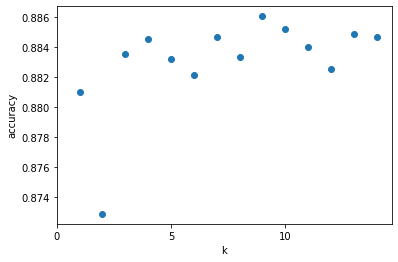

In [ ]:
k_range = range(1, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10])



# **Aprendizaje Automático**

El objetivo de este práctico es afianzar los conocimientos adquiridos hasta este momento, haciendo un proceso de re-análisis de los datos para encarar desde distintas perspectivas (selección de features, redefinición de clases y subclases) para conseguir nuevos resultados sobre los modelos ya trabajados, añadiendo ensemble learning al análisis.

La idea es aprender a iterar en el proceso de ciencia de datos, no quedandonos con los resultados obtenidos del primer proceso realizado.

# **Enunciado**

Se les da la libertad de hacer los análisis que consideren necesarios en base a lo ya aprendido, encarando el problema desde distintos puntos de vista sobre todo en el proceso de los datos.

Se les dá la libertad de seleccionar una de las Targets o ambas para aplicar los algoritmos.

Se desea generar perspectivas diferentes que amplíen desde la investigación los resultados ya obtenidos.

Generar un informe del enfoque que se tomó y cuales son las conclusiones a las que se arribó.

Se pide también que sumen aquellos algoritmos en la medida de lo posible (por la cantidad de datos) aprendidos en AS de la familia de Ensemble Learning

In [9]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [10]:
rfc= RandomForestClassifier(n_estimators=500, random_state=1)
abc= AdaBoostClassifier(n_estimators=500, random_state=1, learning_rate=0.01)
gbc= GradientBoostingClassifier(n_estimators=500, random_state=1, learning_rate=0.01)
xgb_clf=xgb.XGBClassifier(n_estimators=500, random_state=1, learning_rate=0.01)

In [20]:
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
print('Random Forest Score: ', rfc.score(X_test, y_test))
print('Ada Boost Score: ', abc.score(X_test, y_test))
print('Gradient Boosting Score: ', gbc.score(X_test, y_test))
print('XGBoost Score: ', xgb_clf.score(X_test, y_test))

Random Forest Score:  0.9146238377007607
Ada Boost Score:  0.4294167371090448
Gradient Boosting Score:  0.8995773457311919
XGBoost Score:  0.8909551986475064
